In [25]:
%load_ext autoreload
%autoreload 2

# Ensure your Python version makes sense
import sys
sys.version

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

import pandas as pd
import json, os


def plot(logdir, env, timesteps, trials, title=None):
    fig = plt.figure(figsize=(9,7))
    
    methods = {}
    dataframes = []
    i = 0
    
    for path in trials:
        full_path = os.path.join(logdir, path)
        log_path = os.path.join(full_path,'log.txt')
        parts = path.split('/')[-1].split('_')
        name = '_'.join(parts[:parts.index(env)])
        data = pd.read_csv(log_path, sep='\t')  # in favor of this
        trial_data = pd.DataFrame({"Steps": data['Steps'] / 1e6, "Avg_Last_100_Episodes": data['Avg_Last_100_Episodes']})
        if name in methods:
             dataframes[methods[name]] = pd.concat([dataframes[methods[name]], trial_data], 
                                                 axis=0)
        else:
            dataframes.append(trial_data)
            methods[name] = i
            i += 1
            
    for name in methods:
        all_trial_data = dataframes[methods[name]]
        sns.lineplot(all_trial_data['Steps'], all_trial_data['Avg_Last_100_Episodes'], lw=2, label=name)

    # Bells and whistles
    plt.tick_params(axis='x', labelsize=18)
    plt.tick_params(axis='y', labelsize=18)
    plt.legend(loc='best', fontsize=20)
    plt.xlabel('Training Steps (in Millions)', fontsize=20)
    plt.ylabel('Avg Last 100 Episodes', fontsize=20)
    if title is None:
        plt.title('{} {}'.format(env, timesteps), fontsize=24)
    else:
        plt.title(title)
    plt.tight_layout()
    plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


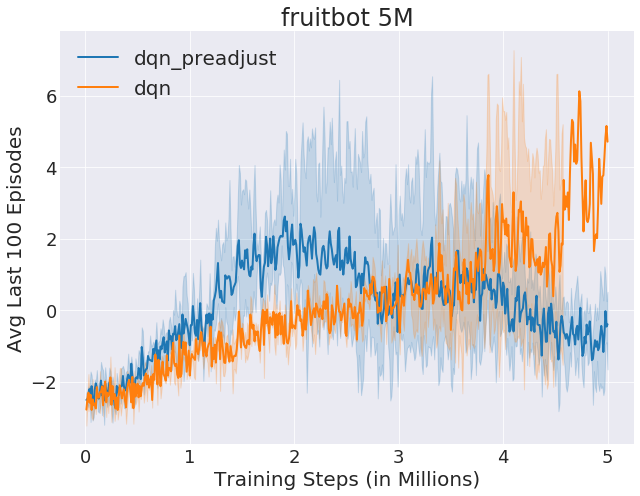

In [24]:
# 5m vanilla with previous epsilon and adjusted epsilon
trials = [
    'dqn_preadjustedepsilon/dqn_preadjust_fruitbot_29-04-2020_20-21-32',
    'dqn_preadjustedepsilon/dqn_preadjust_fruitbot_28-04-2020_19-22-33',
    'dqn_preadjustedepsilon/dqn_preadjust_fruitbot_27-04-2020_20-25-37',
    
    'dqn_fruitbot_30-04-2020_09-05-56', 
    'dqn_fruitbot_30-04-2020_20-23-52',
]

plot(logdir='data_dqn', env='fruitbot', timesteps="5M", trials=trials)

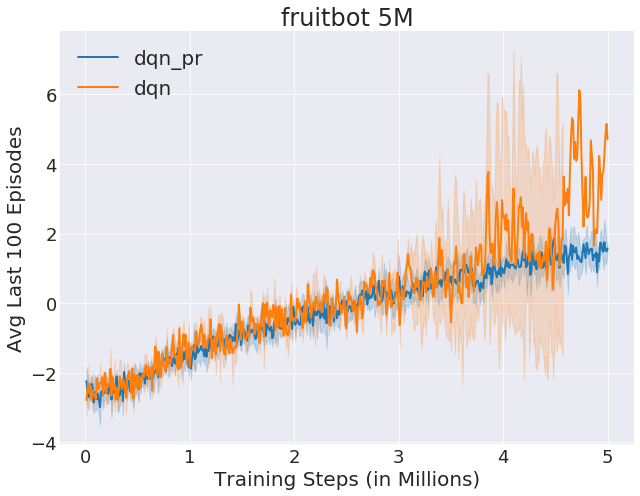

In [21]:
# 5m pr and non pr comparison
trials = [
   'dqn_pr_fruitbot_04-05-2020_20-50-16',
   'dqn_pr_fruitbot_05-05-2020_08-03-03',
   'dqn_pr_fruitbot_05-05-2020_21-58-59',
   'dqn_pr_fruitbot_06-05-2020_09-26-59',
   'dqn_pr_fruitbot_06-05-2020_20-46-40',
    
    'dqn_fruitbot_30-04-2020_09-05-56', 
    'dqn_fruitbot_30-04-2020_20-23-52',
]

plot(logdir='data_dqn', env='fruitbot', timesteps="5M", trials=trials)